In [86]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
# Reading the data

df=pd.read_excel('iris_1.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [90]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Null values found in 3 columns

In [94]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [95]:
# Filling the null values with mean of that column values

for col in df[['SL','SW','PL','PW']]:
    df[col].fillna(df[col].mean(),inplace=True)

In [96]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [97]:
# Checking for any different input in column
for i in df[['SL','SW','PL','PW']]:
    print(df[i].unique())

[5.1        4.9        5.85594406 4.6        5.         5.4
 4.4        4.8        4.3        5.8        5.7        5.2
 4.7        5.5        4.5        5.3        7.         6.9
 6.5        6.3        6.6        5.9        6.         6.1
 5.6        6.7        6.2        6.4        6.8        7.1
 7.6        7.3        7.2        7.7        7.4        7.9       ]
[3.5        3.         3.2        3.1        3.6        3.9
 3.4        2.9        3.04930556 4.         4.4        3.8
 3.7        3.3        4.1        4.2        2.3        2.8
 2.4        2.7        2.         2.2        2.5        2.6       ]
[1.4     1.3     1.5     1.7     1.6     1.1     1.2     1.      1.9
 3.75625 4.7     4.5     4.9     4.      4.6     3.3     3.9     3.5
 4.2     3.6     4.4     4.1     4.8     4.3     5.      3.8     3.7
 5.1     3.      6.      5.9     5.6     5.8     6.6     6.3     5.3
 5.5     6.7     6.9     5.7     6.1     6.4     5.4     5.2    ]
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1

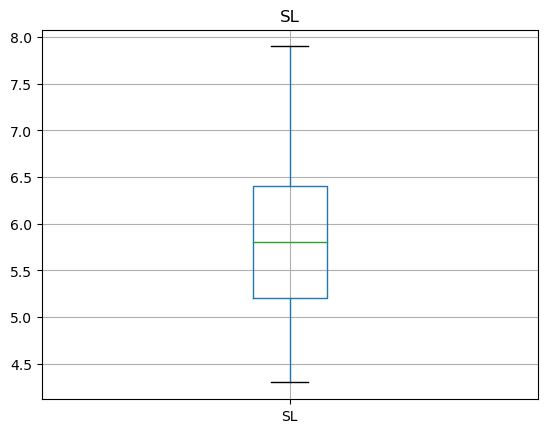

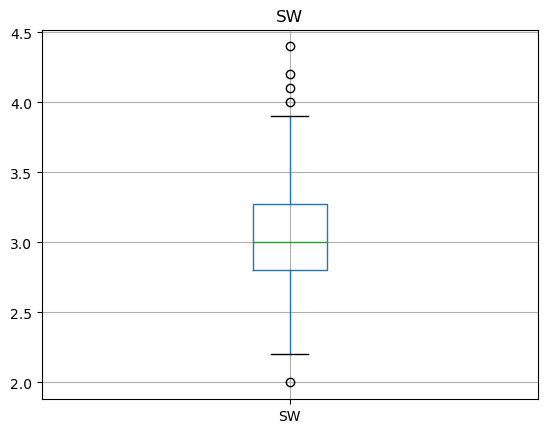

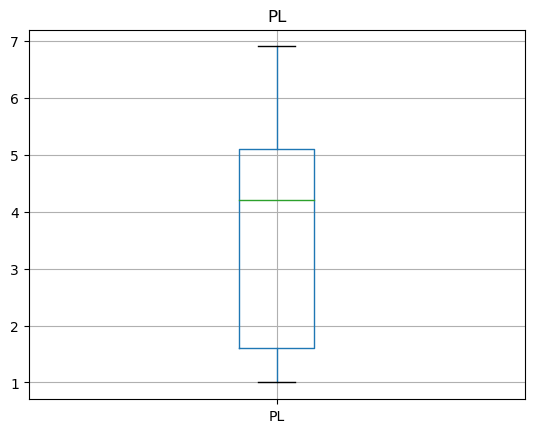

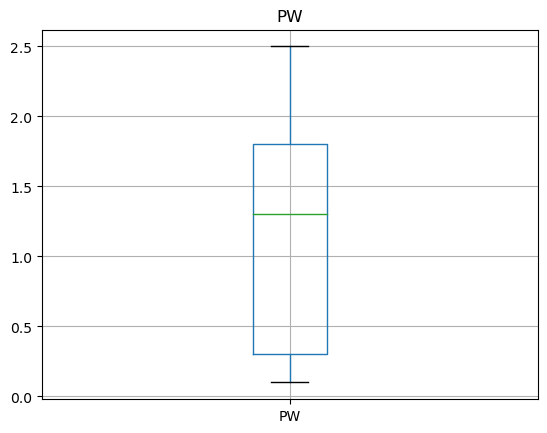

In [98]:
#Checking for outliers in all columns

for col in df.columns:
    if df[col].dtype!='object':
        plt.figure()
        df.boxplot([col])
        plt.title(col)
    

Outlier found in SW

In [99]:
# Treating the outliers
#Inter quartile range and upper and lower limit calculated

for col in df.columns:
    if df[col].dtype!='object':
        q1=df[col].quantile(0.25)
        q2=df[col].quantile(0.75)
        iqr=q2-q1
        upper=q2+1.5*iqr
        lower=q1-1.5*iqr
#Outliers lying above upper limit is substitued with upper limit value and those lying below lower limit  is subtituted with lower limit value       
        df[col]=np.where(df[col]>upper,upper,df[col])
        df[col]=np.where(df[col]<lower,lower,df[col])

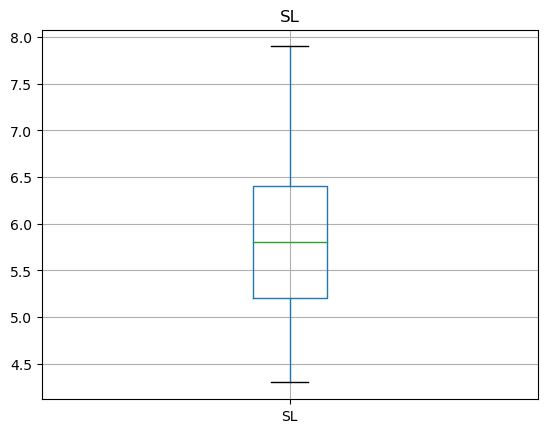

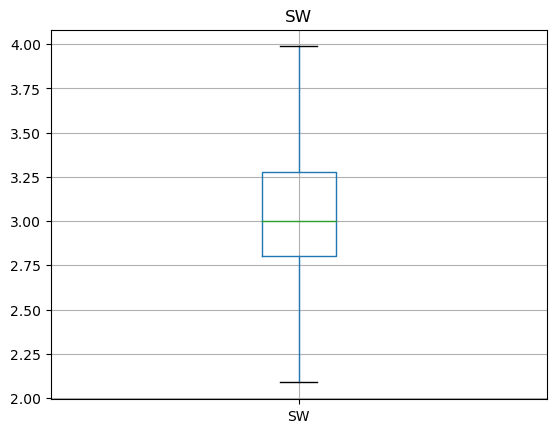

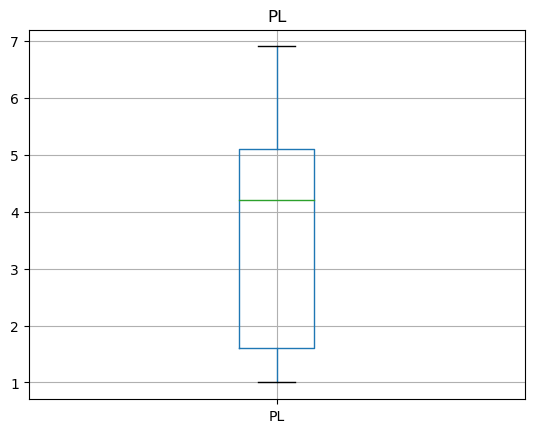

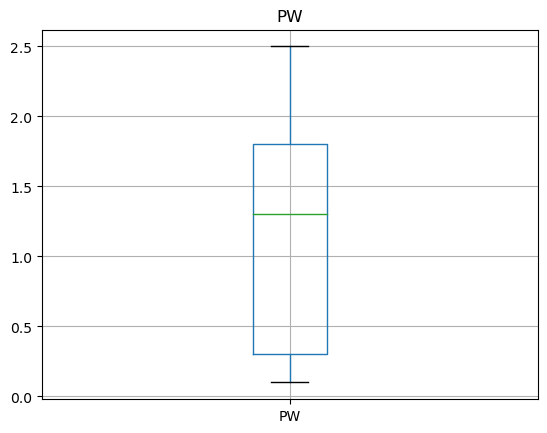

In [100]:
#Again check for outliers
for col in df.columns:
    if df[col].dtype!='object':
        plt.figure()
        df.boxplot([col])
        plt.title(col)

In [101]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [102]:
#Encoding target variable with  with label encoder for transforming categorical variable in to numerical one

from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['Classification']=Le.fit_transform(df['Classification'])

In [53]:
#Dependent and target variables are defined.Classification is the target variable which has to be predicted
x=df.drop(['Classification'],axis=1) 
y=df['Classification']

In [103]:
x.head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.855944,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [104]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

In [105]:
#Splitting the data for training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [106]:
x_train.shape

(120, 4)

In [107]:
x_test.shape

(30, 4)

As it is a classification,we can use Logistic regression,kNN,SVM,RandomForest and Decision Tree for prediction

Logistic Regression

In [109]:
#Model using Logistic Regression
#As is is a multi class problem,define multi_class and solver parameter while creating class
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(multi_class='ovr',solver='lbfgs')
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

Metrics to evaluate classification algorithm are Accuracy,Precision,Recall and F1 score

In [110]:
#Metrics for Logistic Regression
# As it is a multi class problem,
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [111]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Using kNN 

In [114]:
#using kNN for prediction
#Testing number of neighbours which gives bst result by looping the number from 3 to 14 and metrics are evaluated and the one with best accuracy is taken
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=4)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)


In [115]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [117]:
# Several n gives accuracy 1,we will take n=8 as number of neighbours
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=4)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


In [118]:
# Evaluating matrics of kNN

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [119]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Using SVM 

In [120]:
# Using SVM for prediction

from sklearn.svm import SVC 
sv_clf=SVC()
sv_clf.fit(x_train,y_train)
y_pred=sv_clf.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [122]:
# Matrics for evaluating SVM

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


Using Decision Tree Classifier

In [123]:
# Using Decision tree for prediction
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [124]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [126]:
# Matrics for evaluating Decision tree

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


Using RandomForest

In [127]:
#Using RandomForest for prediction

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [128]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [129]:
#Evaluating RandomForest

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


5 methods were used for making models for prediction
1.Logistic regression
2.kNN
3.SVM
4.Decision Tree
5.RandomForest

While evaluating with matrics,allmodels found to be performing with accuracy 1

Hence all the models can be used for prediction